# Time Series Project

## Assignment Overview & Instructions

The objective of Project 2 is to extract time series features for human activity
monitoring.

### Dataset
The following [link](https://www.uni-mannheim.de/dws/research/projects/activity-recognition/#dataset_realworld) provides human activity data for 15 subjects. Click on each subject to
access the time series data.   
For this project consider accelerometer data for all the 15
subjects for walking, running, climbing up and climbing down for chest sensor only.

### **Tasks:** 

1. Load the required data into 'df' dataframe. 


2. Vary the following parameters, compute permutation entropy and complexity for the aforementioned data. Consider the accelerometer data in all three directions. If you do everything correctly, your output table should have 6480 row entries!

|                     |                   |
|---------------------|-------------------|
| Embedded Dimension  | 3, 4, 5, 6        |
| Embedded Delay      | 1, 2, 3           |
| Signal Length       | 1024, 2048, 4096  |



**Sample output table**

|   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|
| Subject  | Accelerometer axis   | Signal length  | Dimension  | Delay  | Permutation entropy  | Complexity  | Activity  |
| 1 to 15  | x or y or z  | 1024 or 2048 or 4096  | 3 or 4 or 5 or 6  | 1 or 2 or 3  |   |   | Walking or running or climbing up or climbing down  |

 
3. Select one particular subject of your choice (e.g 3), a particular attribute of your choice (e.g x) and a particular Signal length (e.g 2014) and filter the data for these specifics. In the following steps, you will focus your analysis on this partcular subject for the specified accelerometer axis and signal length.

4. Using scatter plots, identify the optimum dimension, delay and signal length that provide the best separation between walking and running for the filtered data from task 3.  

4. Using scatter plots, identify the optimum dimension, delay and signal length that provide the best separation between climbing up and climbing down for the filtered data from task 3. 

In [214]:
## YOUR CODE HERE
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [129]:
#Task 1
#for loop to read files iteratively


nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
acc =['climbingdown', 'climbingup', 'running', 'walking']

for num in nums:
    for x in acc:
        df = pd.read_csv('s' + num + '_acc_' + x + '_' + x + '_chest.csv' )


#Object info of dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33217 entries, 0 to 33216
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         33217 non-null  int64  
 1   attr_time  33217 non-null  int64  
 2   attr_x     33217 non-null  float64
 3   attr_y     33217 non-null  float64
 4   attr_z     33217 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.3 MB


This is the code I will use in task 2 to gether the necessary data. It will run iteratively over each subject and activity and should result in Subject 15 Walking activity as the final iteration.

In [34]:
#Here are the functions from the Hands-On Lab that will be used and adapted in this project
def s_entropy(freq_list):
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

In [177]:
#Creating Output Table
results = {'Subject': [], 
          'Accelerometer Axis': [],
          'Signal Length': [],
          'Dimension': [],
          'Delay': [],
          'Permutation Entropy': [],
          'Complexity': [],
          'Activity': []}


In [178]:
#Task 2
#Results table for accelerometer=x,y,z, signal length=1024, 2048, 4096, dimension=3,4,5,6, delay=1,2,3
nums = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
acc =['climbingdown', 'climbingup', 'running', 'walking']
dim = [3, 4, 5, 6]
delay = [1, 2, 3]
signal = [1024, 2048, 4096]

for num in nums:
    for x in acc:
        for s in signal:
            for d in dim:
                for de in delay:
                    df = pd.read_csv('s' + num + '_acc_' + x + '_' + x + '_chest.csv' )
                    tsx1 = df.iloc[0:s,2] #Slicing from first row to signal length 1024
                    op_tsx1 = ordinal_patterns(tsx1, d, de) #Sliced signal length, dimension, delay
                    p = p_entropy(op_tsx1) #p_entropy function
                    c = complexity(op_tsx1) #complexity function
                    results['Subject'].append(num) #appending values to the results table after each iteration
                    results['Accelerometer Axis'].append('X')
                    results['Signal Length'].append(s)
                    results['Dimension'].append(d)
                    results['Delay'].append(de)
                    results['Permutation Entropy'].append(p)
                    results['Complexity'].append(c)
                    results['Activity'].append(x)
                    tsy1 = df.iloc[0:s,3] #Slicing from first row to signal length 2048
                    op_tsy1 = ordinal_patterns(tsy1, d, de)
                    p = p_entropy(op_tsy1)
                    c = complexity(op_tsy1)
                    results['Subject'].append(num)
                    results['Accelerometer Axis'].append('Y')
                    results['Signal Length'].append(s)
                    results['Dimension'].append(d)
                    results['Delay'].append(de)
                    results['Permutation Entropy'].append(p)
                    results['Complexity'].append(c)
                    results['Activity'].append(x)
                    tsz1 = df.iloc[0:s,4] #Slicing from first row to signal length 4096
                    op_tsz1 = ordinal_patterns(tsz1, d, de)
                    p = p_entropy(op_tsz1)
                    c = complexity(op_tsz1)
                    results['Subject'].append(num)
                    results['Accelerometer Axis'].append('Z')
                    results['Signal Length'].append(s)
                    results['Dimension'].append(d)
                    results['Delay'].append(de)
                    results['Permutation Entropy'].append(p)
                    results['Complexity'].append(c)
                    results['Activity'].append(x)
        

This code will run through each of the for loops and append three different sets of calculations based on the signal length of 1024, 2048, and 4096. There should be 6480 rows of data after all iterations are completed.

In [200]:
#Just to check if code ran but is unnecessary for final submission
#result = pd.DataFrame(results)
#result

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,X,1024,3,1,0.863880,0.113789,climbingdown
1,1,Y,1024,3,1,0.871156,0.109263,climbingdown
2,1,Z,1024,3,1,0.866439,0.112078,climbingdown
3,1,X,1024,3,2,0.961099,0.035851,climbingdown
4,1,Y,1024,3,2,0.961402,0.035727,climbingdown
...,...,...,...,...,...,...,...,...
6475,15,Y,4096,6,2,0.818410,0.273707,walking
6476,15,Z,4096,6,2,0.883784,0.208106,walking
6477,15,X,4096,6,3,0.917125,0.165432,walking
6478,15,Y,4096,6,3,0.855229,0.240425,walking


In [182]:
#Length of the results dataframe
len(result)

6480

In [180]:
#Head of the results dataframe
result = pd.DataFrame(results)
result.head(25)

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
0,1,X,1024,3,1,0.863880,0.113789,climbingdown
1,1,Y,1024,3,1,0.871156,0.109263,climbingdown
2,1,Z,1024,3,1,0.866439,0.112078,climbingdown
3,1,X,1024,3,2,0.961099,0.035851,climbingdown
4,1,Y,1024,3,2,0.961402,0.035727,climbingdown
5,1,Z,1024,3,2,0.985906,0.013436,climbingdown
6,1,X,1024,3,3,0.985393,0.013915,climbingdown
7,1,Y,1024,3,3,0.985843,0.013564,climbingdown
8,1,Z,1024,3,3,0.999200,0.000788,climbingdown
9,1,X,1024,4,1,0.807330,0.188031,climbingdown


In [181]:
#Tail of results dataframe
result.tail(25)

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
6455,15,Z,4096,4,1,0.778162,0.206080,walking
6456,15,X,4096,4,2,0.874788,0.141437,walking
6457,15,Y,4096,4,2,0.827576,0.186469,walking
6458,15,Z,4096,4,2,0.898896,0.118083,walking
6459,15,X,4096,4,3,0.943511,0.070616,walking
6460,15,Y,4096,4,3,0.908271,0.109488,walking
6461,15,Z,4096,4,3,0.956884,0.055072,walking
6462,15,X,4096,5,1,0.693302,0.298990,walking
6463,15,Y,4096,5,1,0.648406,0.310535,walking
6464,15,Z,4096,5,1,0.748103,0.276613,walking


In [183]:
result_mid = result.iloc[2000:2500]
result_mid

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
2000,5,Z,2048,5,1,0.896224,0.165988,running
2001,5,X,2048,5,2,0.929652,0.120476,running
2002,5,Y,2048,5,2,0.736092,0.253095,running
2003,5,Z,2048,5,2,0.952390,0.078574,running
2004,5,X,2048,5,3,0.938080,0.101755,running
...,...,...,...,...,...,...,...,...
2495,6,Z,1024,4,1,0.806333,0.194633,walking
2496,6,X,1024,4,2,0.888746,0.127287,walking
2497,6,Y,1024,4,2,0.839257,0.168821,walking
2498,6,Z,1024,4,2,0.944022,0.067398,walking


In [252]:
#Task 3
#Subject 13, Axis X, Signal Length 4096

filtered_resultswr = result.loc[(result['Subject'] == '13') & (result['Accelerometer Axis'].str.startswith('X')) & (result['Signal Length'] == 4096) & (result['Activity'].str.endswith('ing'))] 
filtered_resultswr #Filtered data based on specified parameters above

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
5472,13,X,4096,3,1,0.906475,0.081765,running
5475,13,X,4096,3,2,0.948118,0.047837,running
5478,13,X,4096,3,3,0.969161,0.029172,running
5481,13,X,4096,4,1,0.855451,0.150400,running
5484,13,X,4096,4,2,0.916712,0.092237,running
5487,13,X,4096,4,3,0.944727,0.069586,running
5490,13,X,4096,5,1,0.820912,0.221629,running
5493,13,X,4096,5,2,0.880146,0.171224,running
5496,13,X,4096,5,3,0.885449,0.177831,running
5499,13,X,4096,6,1,0.826418,0.247117,running


In [1]:
#Length of filtered table
len(filtered_resultswr)

NameError: name 'filtered_resultswr' is not defined

In [255]:
filtered_resultsud = result.loc[(result['Subject'] == '13') & (result['Accelerometer Axis'].str.startswith('X')) & (result['Signal Length'] == 4096) & (result['Activity'].str.startswith('climb'))] 
filtered_resultsud #Filtered data based on specified parameters above

,Subject,Accelerometer Axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Activity
5256,13,X,4096,3,1,0.799251,0.157447,climbingdown
5259,13,X,4096,3,2,0.903722,0.083829,climbingdown
5262,13,X,4096,3,3,0.958788,0.037991,climbingdown
5265,13,X,4096,4,1,0.721175,0.232914,climbingdown
5268,13,X,4096,4,2,0.856393,0.157063,climbingdown
5271,13,X,4096,4,3,0.931199,0.086135,climbingdown
5274,13,X,4096,5,1,0.689535,0.293925,climbingdown
5277,13,X,4096,5,2,0.830579,0.230490,climbingdown
5280,13,X,4096,5,3,0.919869,0.131116,climbingdown
5283,13,X,4096,6,1,0.720790,0.307211,climbingdown


In [256]:
#Length of the second filtered table
len(filtered_resultsud)

24

The filtered data is separated into two seperate tables so it can be easier to do tasks 4 and 5 individually. There should be 48 rows of data total for each parameter set based on the fixed parameters of Subject = 13, Accelerometer Axis = X, and Signal Length = 4096. 

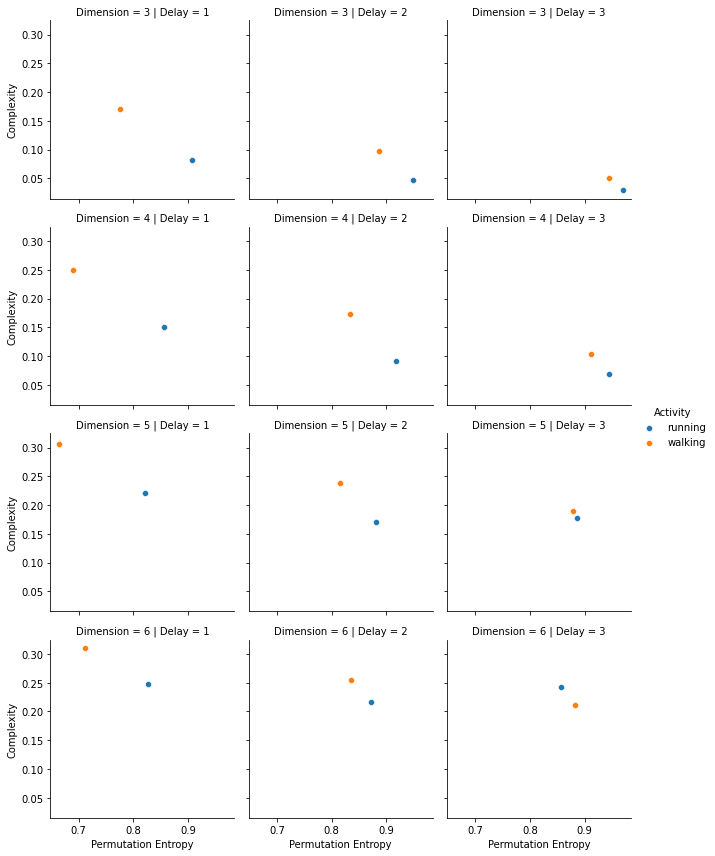

In [254]:
#Task 4
#Generate facet grid of 12 scatterplots for dimension and delay comparing walking and running
grid1 = sns.FacetGrid(filtered_resultswr, col="Delay",  row="Dimension", hue="Activity")
grid1.map(sns.scatterplot, "Permutation Entropy", "Complexity")
grid1.add_legend()

Based on the facet grid above, the maximum distance between the values for running and walking can be seen in the scatterplot of Dimension = 4 and Delay = 1.

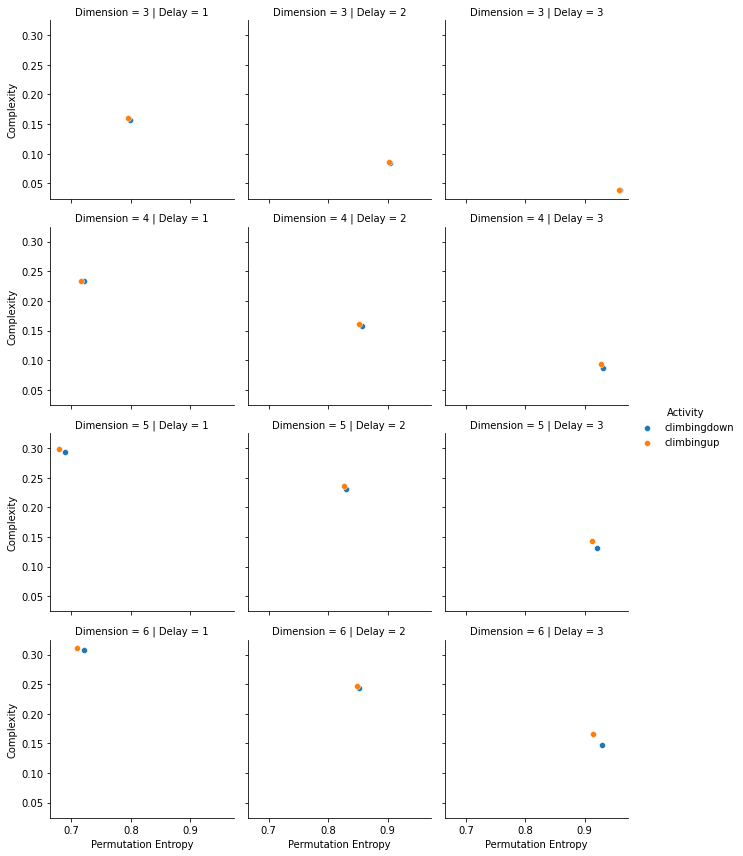

In [257]:
#Task 5
#Generate facet grid of 12 scatterplots for dimension and delay comparing climbing up and climbing down
grid2 = sns.FacetGrid(filtered_resultsud, col="Delay",  row="Dimension", hue="Activity")
grid2.map(sns.scatterplot, "Permutation Entropy", "Complexity")
grid2.add_legend()

Based on the facet grid above, the maximum distance between the values for climbing up and climbing down can be seen in the scatterplot of Dimension = 6 and Delay = 3.